#### Necessary python imports

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
img = plt.imread('./data/Mona_Lisa.jpg')

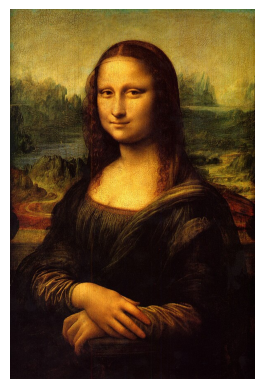

In [20]:
plt.axis('off')
plt.imshow(img)

In [21]:
height = img.shape[0]
width = img.shape[1]
print(height,width)

899 594


In [22]:
def shiftimg(img, tx):
    height, width, _ = img.shape
    shifted_img = np.zeros_like(img) 
    
    if tx > 0:        
        shifted_img[:, tx:, :] = img[:, :width-tx, :]
    elif tx < 0:
        shifted_img[:, :width+tx, :] = img[:, -tx:, :]
    else:
        shifted_img = img.copy()

    return shifted_img


[0.9018321326009997, 0.9081513746867558, 0.9143562240825924, 0.9207426144737458, 0.9275807740925015, 0.9342446654782461, 0.9403735172756986, 0.9485131556168451, 0.949774328477187, 0.9612200393570921, 1, 0.9614762229928053, 0.9502079973475219, 0.9491398070104965, 0.9412782544443283, 0.9353667090034742, 0.9288747044238117, 0.9222416536273965, 0.9160120039201705, 0.9099058749932729, 0.9037455664372968]


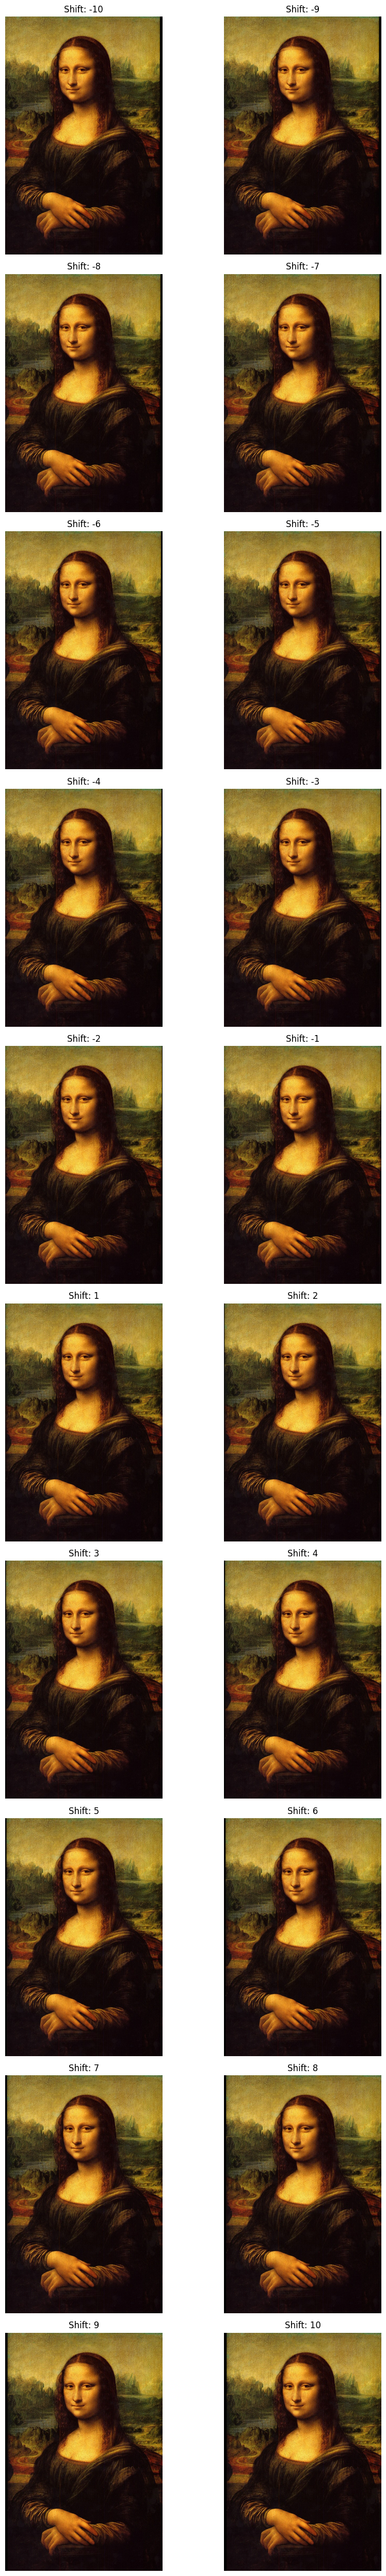

In [23]:

fig, ax = plt.subplots(10, 2, figsize=(10, 50))
correlation_list = []

for i, tx in enumerate(range(-10, 11)):
    if tx>0:
        i-=1
    if tx != 0:
        row, col = divmod(i, 2)  
        img_copy = img.copy()
        shifted_image = shiftimg(img_copy, tx)
        ax[row, col].imshow(shifted_image)
        ax[row, col].set_title(f'Shift: {tx}')
        ax[row, col].axis('off') 
        image1_flatten = shifted_image.flatten()
        image2_flatten = img_copy.flatten()
        correlation = np.corrcoef(image1_flatten, image2_flatten)[0, 1]
        correlation_list.append(correlation)
    if tx==0:
        correlation_list.append(1)
        
print(correlation_list)


plt.tight_layout()
plt.show()


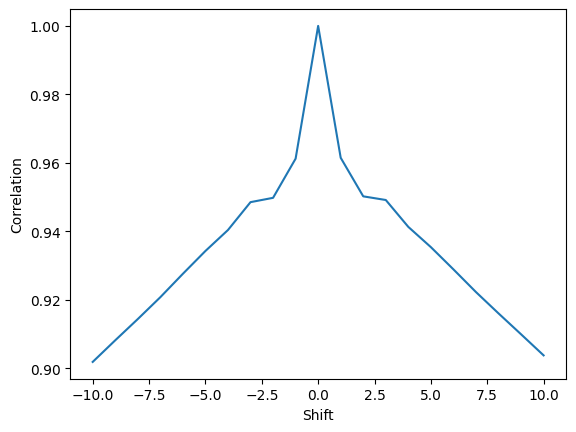

In [24]:
shifts = list(range(-10, 11))
plt.xlabel('Shift')
plt.ylabel('Correlation')
plt.plot(shifts,correlation_list)



In [25]:
def draw_hist(img, color):
    values = img[:,:,color]
    hist = np.zeros(256, dtype=int)
    for row in values:
        for pixel in row:
            hist[pixel]+=1

    print(hist)
    plt.bar(list(range(0,256)), hist, width=1, edgecolor='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensities')
    plt.show()
    


[    1     1     3     7    18    25   106   236   597   940  1681  2902
  4711  7032 10302 12722 14198 14772 14824 14007 13276 12401 10987 10441
  9287  8459  7537  6995  6265  5730  5213  4855  4513  4318  4044  3831
  3548  3368  3261  3186  3088  2948  2700  2715  2612  2559  2498  2526
  2487  2534  2417  2369  2265  2294  2203  2212  2304  2193  2223  2157
  2175  2059  1975  2068  1986  1945  1962  1981  1916  1874  1927  1839
  1908  1705  1698  1770  1756  1620  1647  1640  1701  1612  1577  1564
  1512  1564  1577  1489  1453  1395  1500  1422  1436  1406  1385  1402
  1412  1462  1392  1416  1356  1346  1427  1337  1330  1321  1256  1329
  1341  1300  1258  1239  1316  1313  1320  1296  1292  1307  1316  1302
  1317  1337  1414  1348  1418  1494  1425  1402  1473  1497  1548  1436
  1481  1525  1458  1484  1528  1529  1555  1576  1585  1512  1609  1650
  1609  1604  1662  1697  1636  1644  1616  1593  1615  1759  1690  1601
  1658  1662  1718  1652  1736  1678  1655  1656  1

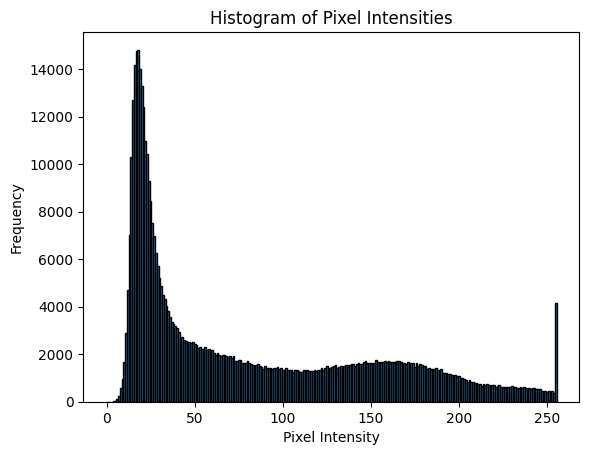

In [26]:
red_img = img.copy()
red_img[:,:,2] = 0
red_img[:,:,1] = 0
draw_hist(red_img,0)

[20251  4661  6394  8772 12029 15614 18831 21231 21988 20994 19277 17926
 17187 16456 15616 14326 12972 11652 10878  9656  8847  8469  7676  7311
  6793  6626  6264  5926  5888  5493  5307  5034  5093  4807  4654  4603
  4328  4353  4314  4298  4021  4122  4002  3931  3724  3798  3738  3572
  3667  3608  3590  3419  3440  3326  3194  3238  3108  3105  2940  2891
  2807  2733  2714  2548  2390  2445  2337  2065  2068  1976  1788  1766
  1679  1633  1502  1415  1331  1212  1164  1126  1006   996   842   881
   794   707   657   585   585   507   464   428   410   352   314   271
   244   220   210   182   186   146   147   131   111    89    71    77
    66    58    49    46    36    41    27    19    24    10    11    10
    13    11     9     7     6     0     7     4     2     3     1     2
     0     0     1     0     0     1     0     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

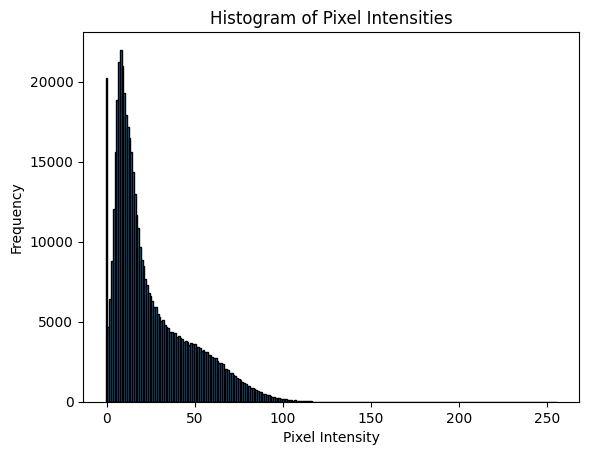

In [27]:
blue_img = img.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0
draw_hist(blue_img,2)

[ 5278  3821  6786 10655 14425 17090 17986 17884 17221 16586 15359 13802
 12360 10971  9653  8569  7506  6558  5962  5290  4887  4522  4142  3833
  3793  3549  3381  3216  3225  3016  2988  2858  2841  2837  2711  2696
  2627  2569  2556  2537  2421  2493  2426  2492  2427  2327  2327  2368
  2273  2242  2205  2226  2144  2218  2087  2078  2017  2033  2041  1980
  1974  1875  1863  1789  1844  1731  1723  1672  1775  1675  1635  1548
  1599  1514  1525  1516  1558  1447  1397  1413  1318  1377  1377  1344
  1365  1364  1355  1329  1260  1305  1281  1303  1342  1274  1367  1352
  1340  1382  1406  1465  1464  1477  1554  1522  1575  1598  1647  1683
  1664  1760  1775  1725  1853  1826  1751  1890  1995  1960  1940  1879
  1961  1886  2076  1943  2008  1968  2024  1914  1981  1978  2003  1938
  1896  1938  1984  2031  1881  1924  1857  1849  1898  1896  1786  1726
  1811  1795  1725  1715  1657  1682  1694  1601  1563  1577  1467  1501
  1409  1413  1436  1330  1266  1321  1260  1279  1

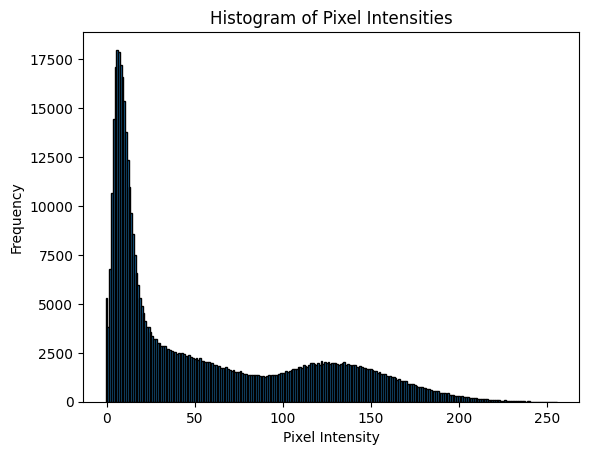

In [28]:
green_img = img.copy()
green_img[:,:,0] = 0
green_img[:,:,2] = 0
draw_hist(green_img,1)